C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[84825   471]
 [   22   125]]
the recall for this model is : 0.850340136054
TP 125
TN 84825
FP 471
FN 22


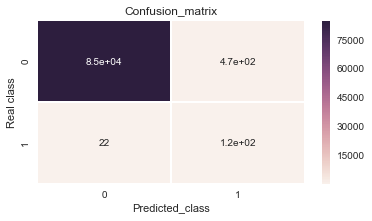


----------Classification Report------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.99      1.00     85296
          1       0.21      0.85      0.34       147

avg / total       1.00      0.99      1.00     85443



In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns#visualization library
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler# required for feature scaling
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2

%matplotlib inline

df = pd.read_csv("d://Python Programs//creditcard.csv")#read the file 
#print(df.shape)# get the number of rows and columns

#sns.countplot("Class",data=df)

def train_test_data(df):

    features = df.ix[:, df.columns !='Class']
    predictor = df.ix[:, df.columns == 'Class']

    train_features, test_features, train_predictor, test_predictor = train_test_split(features, predictor, test_size= 0.3, random_state=0)
    #print(train_features.shape, test_features.shape, train_predictor.shape, test_predictor.shape)

    return(train_features, test_features, train_predictor, test_predictor)

train_features, test_features, train_predictor, test_predictor = train_test_data(df)

smote = SMOTE(random_state=0) #object creation

smote_features_train, smote_predictor_train = smote.fit_sample(train_features,train_predictor)
smote_features_train = pd.DataFrame(data=smote_features_train, columns=train_features.columns)
smote_predictor_train = pd.DataFrame(data=smote_predictor_train,columns=["Class"])

#print("Proportion of Normal data in oversampled data is ",len(smote_predictor_train[smote_predictor_train["Class"]==0])/len(smote_features_train))
#print("Proportion of fraud data in oversampled data is ",len(smote_predictor_train[smote_predictor_train["Class"]==1])/len(smote_features_train))

smote_features_train["Normalized Amount"] = StandardScaler().fit_transform(smote_features_train['Amount'].values.reshape(-1, 1))
smote_features_train.drop(["Amount"],axis=1,inplace=True)
test_features["Normalized Amount"] = StandardScaler().fit_transform(test_features['Amount'].values.reshape(-1, 1))
test_features.drop(["Amount"],axis=1,inplace=True)

def analytics(model, train_features, test_features, train_predictor, test_predictor):
    clf = model
    model.fit(train_features, train_predictor.values.ravel())
    pred = clf.predict(test_features)
    cnf_matrix=confusion_matrix(test_predictor,pred)
    print(cnf_matrix)
    print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    fig= plt.figure(figsize=(6,3))# to plot the graph
    print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
    print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
    print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
    print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
    sns.heatmap(cnf_matrix,annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("\n----------Classification Report------------------------------------")
    print(classification_report(test_predictor,pred))

#clf = LogisticRegression()
clf1 = RandomForestClassifier()
analytics(clf, train_features, test_features, train_predictor, test_predictor )

#analytics(clf1, smote_features_train, test_features, smote_predictor_train, test_predictor)

#clf2 = LogisticRegression()
#analytics(clf2, smote_features_train, test_features, smote_predictor_train, test_predictor)
#clf3 = SVC()
#analytics(clf3, smote_features_train, test_features, smote_predictor_train, test_predictor)

#clf4 = DecisionTreeClassifier(random_state=0)
#analytics(clf4, smote_features_train, test_features, smote_predictor_train, test_predictor)

#clf5 = GaussianNB()
#analytics(clf5, smote_features_train, test_features, smote_predictor_train, test_predictor)

#clf6 = KNeighborsClassifier()
#analytics(clf6, smote_features_train, test_features, smote_predictor_train, test_predictor)

#clf7= GradientBoostingClassifier(n_estimators=200, learning_rate=1.0, max_depth=1, random_state=0)
#analytics(clf7, smote_features_train, test_features, smote_predictor_train, test_predictor)


